In [ ]:
!pip install roboflow opencv-python ultralytics

import os
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

from roboflow import Roboflow
rf = Roboflow(api_key="MbzUz7D6WpOwnPEmWmck")
project = rf.workspace("fingernail-ztwys").project("fingernails-xb812")
version = project.version(11)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/54.8 MB ? eta -:--:--Downloading opencv_python_headless-4.10.0.84-cp37-abi3-macosx_11_0_arm64.whl (54.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 33.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 33.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/892.3 kB ? eta -:--:--Downloading pi_heif-1.1.1-cp313-cp313-macosx_11_0_arm64.whl (892 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 892.3/892.3 kB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 892.3/892.3 kB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/2.8 MB ? eta -:--:--Downloading pillow_avif_plugin-1.5.2-cp313-cp313-macosx_11_0_arm64.whl (2.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [roboflow]4/5 [robof


Extracting Dataset Version Zip to Fingernails-11 in yolov8:: 100%|██████████| 2412/2412 [00:00<00:00, 6872.34it/s]
Extracting Dataset Version Zip to Fingernails-11 in yolov8:: 100%|██████████| 2412/2412 [00:00<00:00, 6872.34it/s]


In [ ]:
# Locate Roboflow dataset folder and data.yaml
import os

dataset_dir = dataset.location 
print("Dataset directory:", dataset_dir)

data_yaml = os.path.join(dataset_dir, "data.yaml")
print("data.yaml path:", data_yaml)

# Quick look at first lines 
with open(data_yaml, "r") as f:
    for i, line in enumerate(f):
        if i >= 25:  # limit output
            break
        print(line.rstrip())

Dataset directory: /Users/lindbergsimpson/Documents/CMU Heinz AIM/Intro to AI/NailDiseaseClassification/Fingernails-11
data.yaml path: /Users/lindbergsimpson/Documents/CMU Heinz AIM/Intro to AI/NailDiseaseClassification/Fingernails-11/data.yaml
names:
- Fingernail
nc: 1
roboflow:
  license: CC BY 4.0
  project: fingernails-xb812
  url: https://universe.roboflow.com/fingernail-ztwys/fingernails-xb812/dataset/11
  version: 11
  workspace: fingernail-ztwys
test: ../test/images
train: ../train/images
val: ../valid/images


In [ ]:
# Train YOLOv8 model
from ultralytics import YOLO

train_model = YOLO("yolov8n.pt")

train_results = train_model.train(
    data=data_yaml,      
    epochs=20,           
    imgsz=512,           
    batch=16,            
    device="mps",
    patience=10,         
    pretrained=True,    
    project="runs",     
    name="nail-detector",
    optimizer="AdamW",     
    lr0=0.005,           
    close_mosaic=0       
)

print("Training complete. Best weights at: runs/detect/nail-detector/weights/best.pt")

Ultralytics 8.3.231 🚀 Python-3.13.5 torch-2.9.1 MPS (Apple M3 Pro)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=0, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/Users/lindbergsimpson/Documents/CMU Heinz AIM/Intro to AI/NailDiseaseClassification/Fingernails-11/data.yaml, degrees=0.0, deterministic=True, device=mps, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.005, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=nail-detector2, nbs=64, nms=False, opset=None, optimize=False, optimizer=A

In [18]:
%matplotlib inline
from IPython import get_ipython
get_ipython().run_line_magic("config", "InlineBackend.figure_formats = ['retina']")

Loaded trained model.

image 1/1 /Users/lindbergsimpson/Documents/CMU Heinz AIM/Intro to AI/NailDiseaseClassification/nail disease.png: 352x512 3 Fingernails, 29.9ms
Speed: 1.1ms preprocess, 29.9ms inference, 1.3ms postprocess per image at shape (1, 3, 352, 512)
image 1/1 /Users/lindbergsimpson/Documents/CMU Heinz AIM/Intro to AI/NailDiseaseClassification/nail disease.png: 352x512 3 Fingernails, 29.9ms
Speed: 1.1ms preprocess, 29.9ms inference, 1.3ms postprocess per image at shape (1, 3, 352, 512)


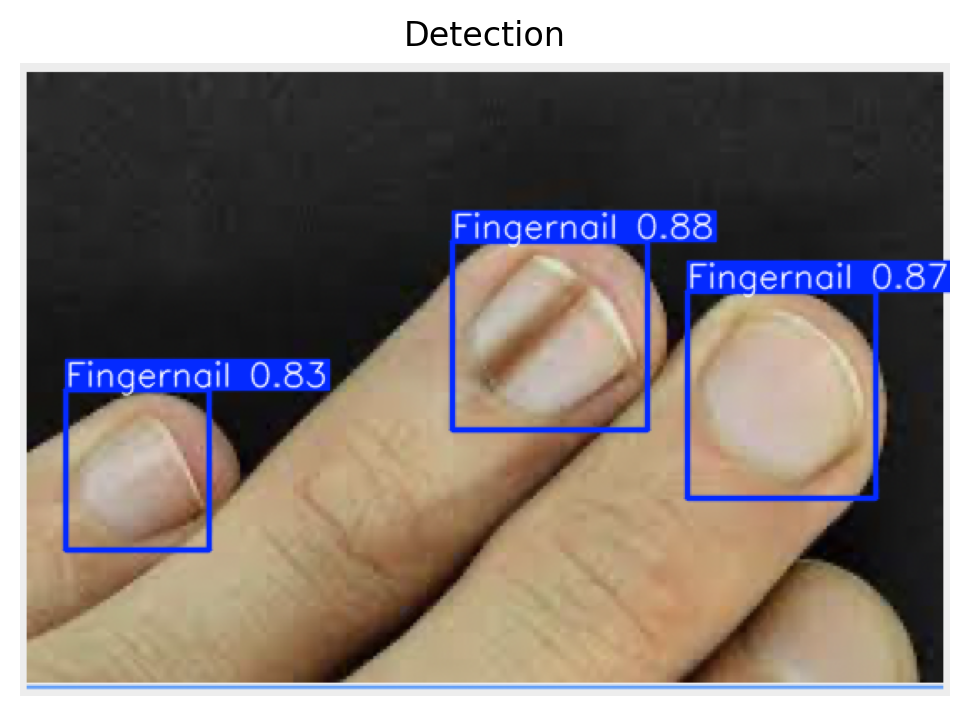

In [ ]:
# Inference with best trained weights
from ultralytics import YOLO

best_weights = "runs/nail-detector2/weights/best.pt"
assert os.path.exists(best_weights), f"Best weights not found: {best_weights}"

trained_model = YOLO(best_weights)
print("Loaded trained model.")

# Use the same IMAGE_PATH or set a new test image
IMAGE_PATH = "nail disease.png"
test_image = IMAGE_PATH

infer_results = trained_model(test_image)
# Display results inline
for r in infer_results:
    annotated = r.plot()  # BGR
    annotated_rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=(6,6))
    ax.imshow(annotated_rgb)
    ax.axis("off")
    ax.set_title("Detection")
    display(fig)   
    plt.close(fig) 


Loaded trained model.

image 1/1 /Users/lindbergsimpson/Documents/CMU Heinz AIM/Intro to AI/NailDiseaseClassification/10125_jpg.rf.874dada59c3a6f742a5ce34591f204d2.jpg: 512x512 5 Fingernails, 30.9ms
Speed: 1.0ms preprocess, 30.9ms inference, 0.5ms postprocess per image at shape (1, 3, 512, 512)
image 1/1 /Users/lindbergsimpson/Documents/CMU Heinz AIM/Intro to AI/NailDiseaseClassification/10125_jpg.rf.874dada59c3a6f742a5ce34591f204d2.jpg: 512x512 5 Fingernails, 30.9ms
Speed: 1.0ms preprocess, 30.9ms inference, 0.5ms postprocess per image at shape (1, 3, 512, 512)


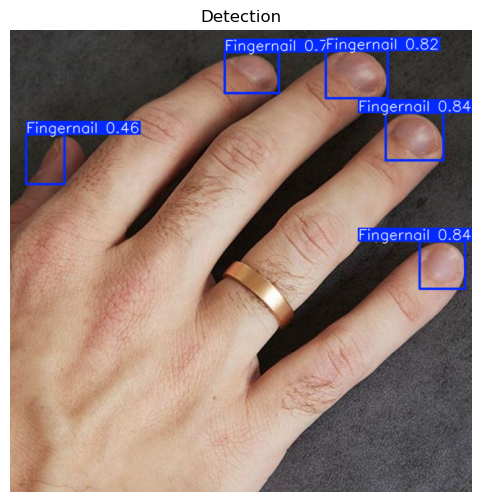

In [ ]:
# Inference with best trained weights
from ultralytics import YOLO
import os, cv2
import matplotlib.pyplot as plt

best_weights = "runs/nail-detector2/weights/best.pt"
assert os.path.exists(best_weights), f"Best weights not found: {best_weights}"

trained_model = YOLO(best_weights)
print("Loaded trained model.")

# Test model
IMAGE_PATH = "10125_jpg.rf.874dada59c3a6f742a5ce34591f204d2.jpg"
test_image = IMAGE_PATH

infer_results = trained_model(test_image)
# Display results inline
for r in infer_results:
    annotated = r.plot() 
    annotated_rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=(6,6))
    ax.imshow(annotated_rgb)
    ax.axis("off")
    ax.set_title("Detection")
    display(fig)
    plt.close(fig)